# Spotify Data 

In [56]:
# import libraries
import pandas as pd
import numpy as np

In [57]:
#start by importing in our csvs
log = pd.read_csv("data/training_set/log_mini.csv")
#read in log data

track = pd.read_csv("data/track_features/tf_mini.csv")
#read in track data
log

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [58]:
log.get(["track_id_clean","skip_1"]).groupby("track_id_clean").count()
    

,skip_1
track_id_clean,
t_00007fba-6bd3-449d-85dd-54d4aea397c2,1
t_0000dc06-0c00-4a09-9dc6-3bdad9c6f0e8,4
t_00020dc1-1b82-43e9-8327-77b074bdf626,1
t_0003d374-de7a-44c0-a2b6-9ee6785a0750,1
t_00042d9b-e795-41a9-89ad-504373dd4287,3
...,...
t_fff7c790-7ca8-4de2-92b3-48d5414db051,1
t_fff847fc-b425-4bc7-b680-9879a07739d5,1
t_fffb45d3-9981-4fe5-99a2-0f3c37f9af96,1


In [59]:
filtered_track = track[['track_id','duration','release_year','us_popularity_estimate','beat_strength','tempo']]
filtered_track

,track_id,duration,release_year,us_popularity_estimate,beat_strength,tempo
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.519497,166.287003
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.419223,95.261002
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.425890,105.185997
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.400934,119.441002
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.371328,95.261002
...,...,...,...,...,...,...
50699,t_402930af-4174-47ec-b1fd-593d93597624,184.686798,2018,99.315966,0.521544,92.927002
50700,t_e5f9a069-a893-452e-ab21-49b4eaebfbd0,251.813324,2018,99.918573,0.565200,124.168999
50701,t_3983306d-13b4-4027-9391-7236ca93d2bf,157.520004,2018,98.517692,0.414721,107.156998
50702,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,129.105392,2018,99.902866,0.688375,134.067993


In [60]:
# drop the skip columns
log_ver1 = log.drop(['skip_1','not_skipped','skip_3'], axis=1)

In [61]:
log_ver1

,session_id,session_position,session_length,track_id_clean,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [62]:
track[['track_id','duration','release_year','us_popularity_estimate','beat_strength']]

,track_id,duration,release_year,us_popularity_estimate,beat_strength
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.519497
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.419223
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.425890
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.400934
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.371328
...,...,...,...,...,...
50699,t_402930af-4174-47ec-b1fd-593d93597624,184.686798,2018,99.315966,0.521544
50700,t_e5f9a069-a893-452e-ab21-49b4eaebfbd0,251.813324,2018,99.918573,0.565200
50701,t_3983306d-13b4-4027-9391-7236ca93d2bf,157.520004,2018,98.517692,0.414721
50702,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,129.105392,2018,99.902866,0.688375


In [63]:
track.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [65]:
log_ver1.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_2                               bool
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle        bool
hour_of_day                         int64
date                               object
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [150]:
#baseline model
as_is = ["session_position", "session_length",
         "context_switch", "no_pause_before_play", "short_pause_before_play", "long_pause_before_play",
         "hist_user_behavior_n_seekfwd", "hist_user_behavior_n_seekback", "hist_user_behavior_is_shuffle",
         "hour_of_day", "premium"]
ohe = ['date', 'context_type']


In [151]:
preproc = ColumnTransformer(
    transformers = [
        ('as_is', FunctionTransformer(lambda x: x), as_is),
        ('one_hot', OneHotEncoder(handle_unknown = 'ignore'), ohe)
    ]
)

In [152]:
log_ver1

,session_id,session_position,session_length,track_id_clean,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [153]:
log_ver1.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_2                               bool
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle        bool
hour_of_day                         int64
date                               object
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [154]:
log_ver1.iloc[4].values

array(['0_00006f66-33e5-4de7-a324-2d18e439fc1e', 5, 20,
       't_64f3743c-f624-46bb-a579-0f3f9a07a123', False, 0, 1, 0, 0, 0, 0,
       True, 16, '2018-07-15', True, 'editorial_playlist', 'trackdone',
       'trackdone'], dtype=object)

In [155]:
pl = Pipeline(steps = [('preprocessor', preproc), ('classifier', DecisionTreeClassifier(max_depth = 10))])
x_train, x_test, y_train, y_test = train_test_split(log_ver1.drop('skip_2', axis = 1), log_ver1['skip_2'], test_size= 0.2)
pl.fit(x_train, y_train)
pl.score(x_test, y_test)

0.5882475577793662

In [156]:
pl['classifier'].feature_importances_

array([0.14469466, 0.13347227, 0.09346831, 0.1435383 , 0.06795075,
       0.        , 0.04221988, 0.05638317, 0.0585049 , 0.09712734,
       0.03736521, 0.        , 0.        , 0.        , 0.        ,
       0.00030171, 0.        , 0.        , 0.        , 0.00254818,
       0.00194537, 0.        , 0.00025635, 0.        , 0.0002818 ,
       0.0003482 , 0.00364856, 0.00137588, 0.        , 0.04364942,
       0.00321371, 0.0210906 , 0.01753534, 0.01525815, 0.01382192])

In [83]:
pl['preprocessor'].sparse_output_ = False

In [85]:
m = pl['preprocessor'].transform(log_ver1.drop('skip_2', axis = 1))

In [90]:
np.unique(m[:, -1])

array([0.0, 1.0], dtype=object)

In [95]:
log_ver1['skip_2'].values

array([False, False, False, ..., False, False, False])

In [132]:
s = list(map(lambda x: 0 if x else 1, log_ver1['skip_2'].values))

In [26]:
pd.Series(list(pl.predict(x_test))).value_counts()

False    22264
True     11312
dtype: int64

In [105]:
m_new = m[:, -1]

In [107]:
import matplotlib.pyplot as plt

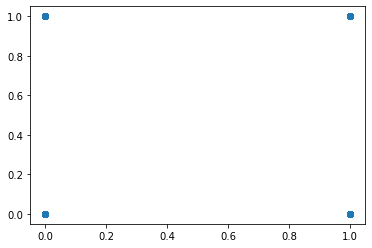

In [108]:
plt.scatter(m[:, -1], s)

In [120]:
pd.DataFrame({'x': m_new, 'y': s}).pivot_table(columns = 'y', values = 'x', aggfunc = 'count')

y,0,1
x,81056,86824


In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [143]:
confusion_matrix(np.array(s), m_new.astype('int'))
#accuracy_score(np.array(s), m_new.astype('int'))

array([[86587,   237],
       [23592, 57464]])

In [52]:
log_ver1['not_skipped']

0         True
1         True
2         True
3         True
4         True
          ... 
167875    True
167876    True
167877    True
167878    True
167879    True
Name: not_skipped, Length: 167880, dtype: bool

In [140]:
log_ver1.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_2', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end'],
      dtype='object')

In [157]:
#drop
log_ver1['hist_user_behavior_reason_end'].value_counts()

fwdbtn       81389
trackdone    57701
endplay      14823
backbtn      13129
logout         563
remote         267
clickrow         8
Name: hist_user_behavior_reason_end, dtype: int64

In [158]:
log_ver1['hist_user_behavior_reason_start'].value_counts()

fwdbtn        79912
trackdone     55075
clickrow      17514
backbtn       13034
appload        1942
playbtn         155
remote          136
trackerror       92
endplay          20
Name: hist_user_behavior_reason_start, dtype: int64